# Implementação de uma Rede Neural para classificação de bananas

Alunos: Ana Carolina da Silva, Gustavo Baroni Bruder, Luiz Gustavo Klitzke, Rodrigo Kapulka Franco, Nicole Bauchspiess

In [1]:
import os

import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow import keras

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pickle

import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Carregar o <i>dataset</i> a partir da estrutura de pastas

In [2]:
nomes_classes = ["rotten", "healthy"]

def load_data_path(path, class_type, x, y):
    for img_path in os.listdir(path):
        img = cv.imread(f'{path}/{img_path}', cv.IMREAD_GRAYSCALE)
        x.append(cv.resize(img, (224, 224)) / 255.0)
        y.append(class_type)


def load_dataset():
    x_train = []
    y_train = []
    x_test = []
    y_test = []

    load_data_path("data/train/Banana__Healthy", 1, x_train, y_train)
    load_data_path("data/train/Banana__Rotten", 0, x_train, y_train)
    load_data_path("data/test/Banana__Healthy", 1, x_test, y_test)
    load_data_path("data/test/Banana__Rotten", 0, x_test, y_test)

    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

x_train, y_train, x_test, y_test = load_dataset()

## Configurar a NN

In [8]:
nn = keras.models.Sequential()
nn.add(keras.layers.Input(shape=[224, 224]))
nn.add(keras.layers.Flatten())

nn.add(keras.layers.Dense(300, activation="relu"))
nn.add(keras.layers.Dropout(rate=0.1))

nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dropout(rate=0.1))

nn.add(keras.layers.Dense(2, activation="softmax"))

nn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │    15,053,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,083,402 (57.54 MB)

 Trainable params: 15,083,402 (57.54 MB)

 Non-trainable params: 0 (0.00 B)

## Treinar a rede

In [9]:
nn.compile(loss="sparse_categorical_crossentropy",
            optimizer="sgd",
            metrics=["accuracy"])

history_nn = nn.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.5956 - loss: 1.3964 - val_accuracy: 0.7806 - val_loss: 0.5082
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.7305 - loss: 0.5031 - val_accuracy: 0.7194 - val_loss: 0.4635
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7938 - loss: 0.4033 - val_accuracy: 0.8083 - val_loss: 0.3973
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8186 - loss: 0.3799 - val_accuracy: 0.8778 - val_loss: 0.3211
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8456 - loss: 0.3325 - val_accuracy: 0.8583 - val_loss: 0.3308
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8733 - loss: 0.2897 - val_accuracy: 0.9083 - val_loss: 0.2468
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.8779 - loss: 0.2859 - val_accuracy: 0.8056 - val_loss: 0.4587
Epoch 8/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.8851 - loss: 0.2580 - val_accu

## Salvar e/ou carregar dados de treinamento para uso posterior

In [10]:
nn.save("resultados/nn.keras")

with open("resultados/history_nn.pkl", "wb") as file:
    pickle.dump(history_nn, file)

In [34]:
nn = keras.models.load_model("resultados/nn.keras")

with open("resultados/history_nn.pkl", "rb") as file:
    history_nn = pickle.load(file)

## Avaliar os resultados do treinamento

In [11]:
nn.evaluate(x_test, y_test, verbose = 1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9050 - loss: 0.3028 


[0.23507404327392578, 0.9194444417953491]

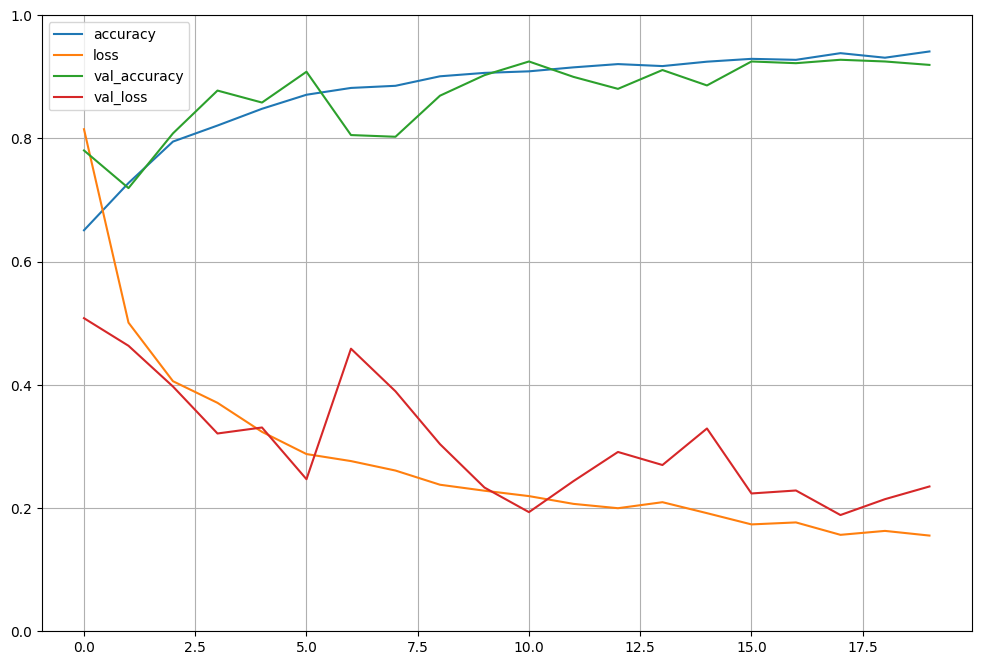

In [12]:
pd.DataFrame(history_nn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Matrizes de confusão de algumas partes do dataset

In [13]:
def monta_matriz_confusao(labels_reais, labels_estimadas, titulo):
    cm = confusion_matrix(labels_reais, labels_estimadas)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nomes_classes)

    # Plotar a matriz de confusão
    plt.figure(figsize = (8, 8))
    disp.plot(cmap = plt.cm.Blues)
    plt.title(titulo)
    plt.ylabel("Classe real")
    plt.xlabel("Classe estimada")
    plt.xticks(rotation =  45)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Previsao: 0 | Verdadeiro: 1
Previsao: 1 | Verdadeiro: 1
Previsao: 1 | Verdadeiro: 1
Previsao: 1 | Verdadeiro: 1
Previsao: 1 | Verdadeiro: 1
Previsao: 1 | Verdadeiro: 1
Previsao: 0 | Verdadeiro: 1
Previsao: 0 | Verdadeiro: 1
Previsao: 1 | Verdadeiro: 1
Previsao: 1 | Verdadeiro: 1


<Figure size 800x800 with 0 Axes>

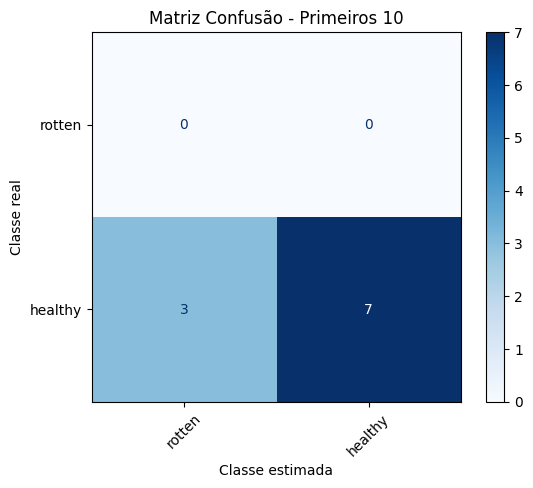

In [14]:
result = nn.predict(x_test[:10])

rotulos_esperados_primeiros_10 = []
rotulos_obtidos_primeiros_10 = []

for i in range(len(result)):
    rotulos_obtidos_primeiros_10.append(np.argmax(result[i], axis=-1))
    rotulos_esperados_primeiros_10.append(y_test[i])
    print(f'Previsao: {np.argmax(result[i], axis=-1)} | Verdadeiro: {y_test[i]}')

monta_matriz_confusao(rotulos_esperados_primeiros_10, rotulos_obtidos_primeiros_10, "Matriz Confusão - Primeiros 10")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 1 | Verdadeiro: 0
Previsao: 1 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 

<Figure size 800x800 with 0 Axes>

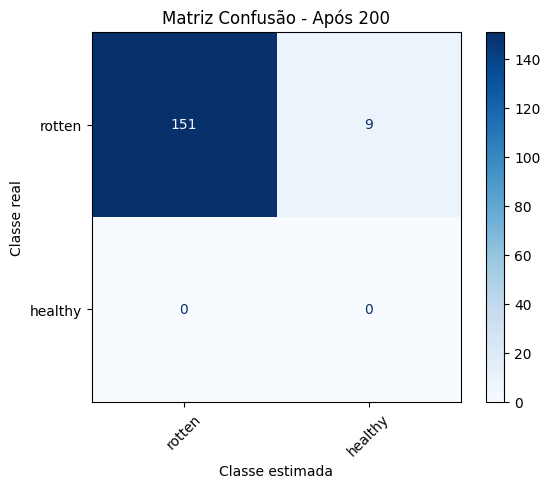

In [15]:
result = nn.predict(x_test[200:])

rotulos_esperados_apos_200 = []
rotulos_obtidos_apos_200 = []

for i in range(len(result)):
    rotulos_obtidos_apos_200.append(np.argmax(result[i], axis=-1))
    rotulos_esperados_apos_200.append(y_test[200 + i])
    print(f'Previsao: {np.argmax(result[i], axis=-1)} | Verdadeiro: {y_test[200 + i]}')

monta_matriz_confusao(rotulos_esperados_apos_200, rotulos_obtidos_apos_200, "Matriz Confusão - Após 200")